In [3]:
import warnings
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report


warnings.filterwarnings("ignore")

In [4]:
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')
test_ids = test_raw['PassengerId'].values
train_raw['train'] = 1
test_raw['train'] = 0
data = train_raw.append(test_raw, sort=False)

In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [6]:
features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

data = data[features + [target]+['train']]
# Categorical values need to be transformed into numeric.
data['Sex'] = data['Sex'].replace(["female", "male"], [0, 1])
data['Embarked'] = data['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
data['Age'] = pd.qcut(data['Age'], 10, labels=False)

In [7]:
# Split data into train and test.
train = data.query('train == 1')
test = data.query('train == 0')


train = train[features + [target]]
test = test[features]

# Drop missing values from the train set.
train.dropna(axis=0, inplace=True)
test.dropna(axis=0, inplace=True)
labels = train[target].values
train = train[features]

In [8]:
print(train)

     Age  Embarked     Fare  Parch  Pclass  Sex  SibSp
0    2.0       1.0   7.2500      0       3    1      1
1    7.0       2.0  71.2833      0       1    0      1
2    4.0       1.0   7.9250      0       3    0      0
3    6.0       1.0  53.1000      0       1    0      1
4    6.0       1.0   8.0500      0       3    1      0
..   ...       ...      ...    ...     ...  ...    ...
885  7.0       3.0  29.1250      5       3    0      0
886  4.0       1.0  13.0000      0       2    1      0
887  1.0       1.0  30.0000      0       1    0      0
889  4.0       2.0  30.0000      0       1    1      0
890  6.0       3.0   7.7500      0       3    1      0

[712 rows x 7 columns]


In [7]:
print(test)

     Age  Embarked      Fare  Parch  Pclass  Sex  SibSp
0    6.0       3.0    7.8292      0       3    1      0
1    8.0       1.0    7.0000      0       3    0      1
2    9.0       3.0    9.6875      0       2    1      0
3    4.0       1.0    8.6625      0       3    1      0
4    2.0       1.0   12.2875      1       3    0      1
..   ...       ...       ...    ...     ...  ...    ...
409  0.0       1.0   13.7750      1       3    0      1
411  7.0       3.0   90.0000      0       1    0      1
412  4.0       1.0    7.7750      0       3    0      0
414  7.0       2.0  108.9000      0       1    0      0
415  7.0       1.0    7.2500      0       3    1      0

[331 rows x 7 columns]


In [8]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2, random_state=1) # 80% training and 20% test

In [9]:
print("X Train : ")
print(X_train)
print("X Test : ")
print(X_test)

X Train : 
     Age  Embarked     Fare  Parch  Pclass  Sex  SibSp
830  1.0       2.0  14.4542      0       3    0      1
566  1.0       1.0   7.8958      0       3    1      0
149  7.0       1.0  13.0000      0       2    1      0
106  2.0       1.0   7.6500      0       3    0      0
290  4.0       1.0  78.8500      0       1    0      0
..   ...       ...      ...    ...     ...  ...    ...
182  0.0       1.0  31.3875      2       3    1      4
809  6.0       1.0  53.1000      0       1    0      1
94   9.0       1.0   7.2500      0       3    1      0
292  6.0       2.0  12.8750      0       2    1      0
51   2.0       1.0   7.8000      0       3    1      0

[569 rows x 7 columns]
X Test : 
     Age  Embarked      Fare  Parch  Pclass  Sex  SibSp
689  1.0       1.0  211.3375      1       1    0      0
279  6.0       1.0   20.2500      1       3    0      1
508  4.0       1.0   22.5250      0       3    1      0
9    0.0       2.0   30.0708      0       2    0      1
496  9.0       

In [10]:
print("Y Train : ")
print(y_train)
print("Y Test : ")
print(y_test)

Y Train : 
[1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 

In [23]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [32]:
print(y_pred)

[1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0.]


In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7972027972027972


In [26]:
precision, recall, fscore, support = score(y_test, y_pred)

print('precision : ', precision)
print('recall    : ', recall)
print('fscore    : ', fscore)
print('support   : ', support)

precision :  [0.81818182 0.76363636]
recall    :  [0.84705882 0.72413793]
fscore    :  [0.83236994 0.74336283]
support   :  [85 58]


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83        85
         1.0       0.76      0.72      0.74        58

    accuracy                           0.80       143
   macro avg       0.79      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143



In [29]:
y = clf.predict(test)

ValueError: Number of features of the model must match the input. Model n_features is 7 and input n_features is 8 

In [17]:
print(y)
print("Panjang y : ", len(y))

[1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1.

In [18]:
test['Survived']=y

In [19]:
print(test)

     Age  Embarked      Fare  Parch  Pclass  Sex  SibSp  Survived
0    6.0       3.0    7.8292      0       3    1      0       1.0
1    8.0       1.0    7.0000      0       3    0      1       0.0
2    9.0       3.0    9.6875      0       2    1      0       0.0
3    4.0       1.0    8.6625      0       3    1      0       1.0
4    2.0       1.0   12.2875      1       3    0      1       1.0
..   ...       ...       ...    ...     ...  ...    ...       ...
409  0.0       1.0   13.7750      1       3    0      1       1.0
411  7.0       3.0   90.0000      0       1    0      1       1.0
412  4.0       1.0    7.7750      0       3    0      0       1.0
414  7.0       2.0  108.9000      0       1    0      0       1.0
415  7.0       1.0    7.2500      0       3    1      0       0.0

[331 rows x 8 columns]


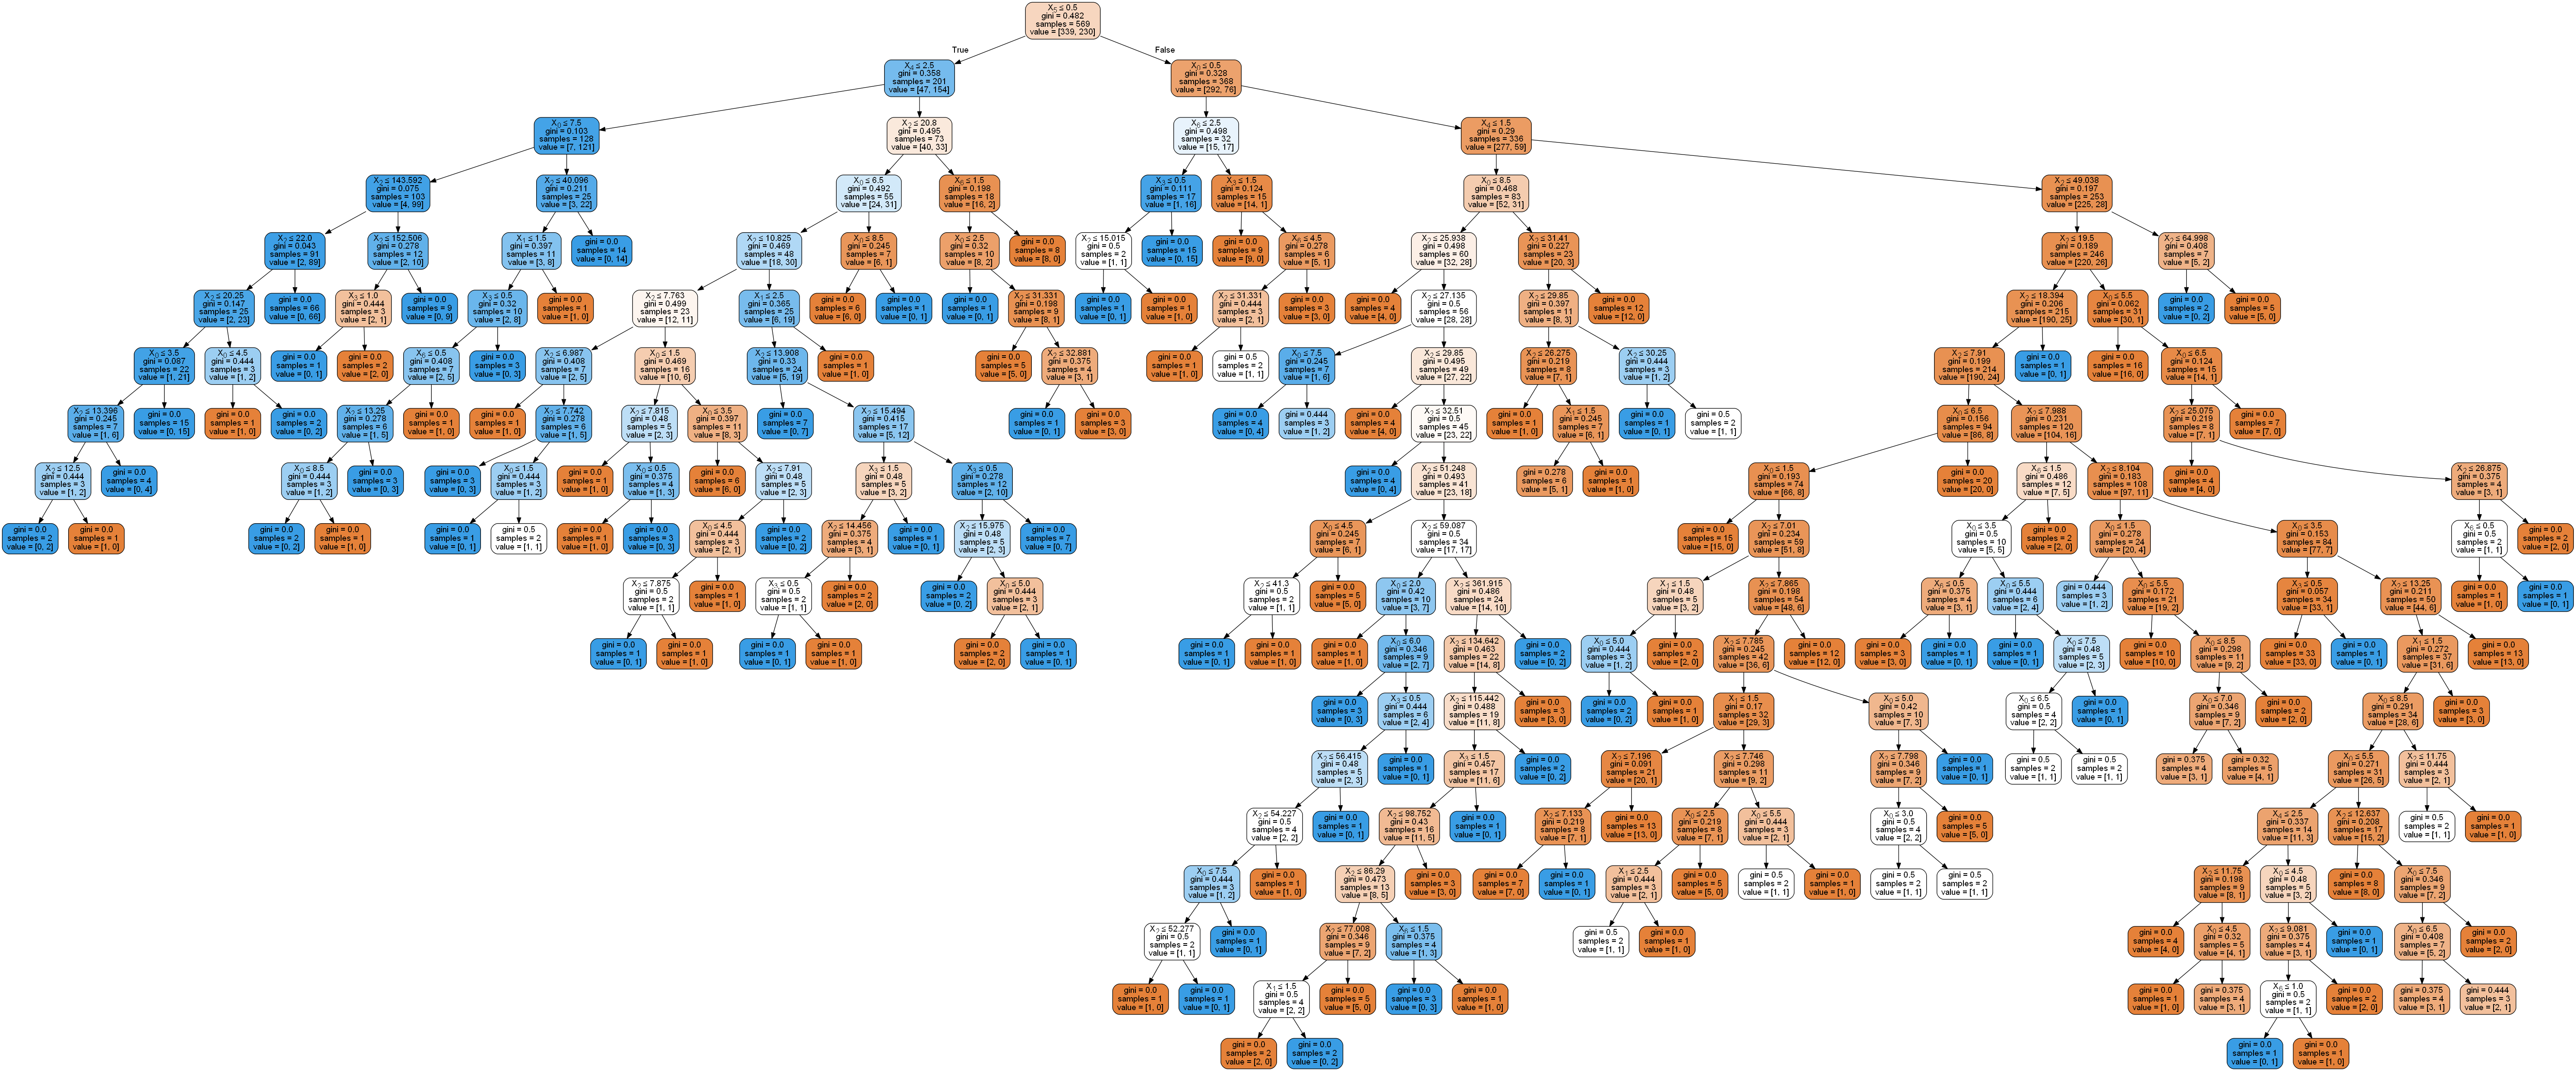

In [22]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())